In [1]:
# %load std_libraries.py
#to keep my scripts consistent, I am adding this to the top of all scripts with %load std_libraries.py
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Bens, b = gpucluster, c = other   ")
location_dict = {'a': "C:\\Users\\heine\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",'c':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)

import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook
data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib_venn import venn2
#import seaborn as sns; sns.set(style="ticks", color_codes=True)
#from sklearn import linear_model
#import pickle
#import subprocess
#import networkx as nx
#import scipy.stats as stats
#import statsmodels.graphics.gofplots as stats_graph
#import scipy.cluster.hierarchy as sch

# from Bio import SeqIO
# from Bio import SeqFeature as sf
# from Bio.Alphabet import generic_dna
# from Bio.Seq import Seq

# import re

from collections import Counter
# import scipy.stats as stats
# from itertools import chain
#this only works if you are online
online_input = input("are you online? Yes/No")
if online_input == "Yes": 
    import plotly.plotly as py
    import plotly.graph_objs as pygo
    import plotly.tools as pytools
    py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
    #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# for phylogenetic trees: 
# from ete3 import Tree

#for scraping internet data (e.g. ncbi)
#import requests
#from lxml import etree    #parses xml output

what computer are you on? a = Bens, b = gpucluster, c = other   a
base directory is C:\Users\heine\github\expression_broad_data
Added C:\Users\heine\github\expression_broad_data to path: 
['', 'C:\\Users\\heine\\Anaconda3\\python36.zip', 'C:\\Users\\heine\\Anaconda3\\DLLs', 'C:\\Users\\heine\\Anaconda3\\lib', 'C:\\Users\\heine\\Anaconda3', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages\\Babel-2.5.0-py3.6.egg', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\heine\\.ipython', 'C:\\Users\\heine\\github\\expression_broad_data']
I am about to import a library
I am importing io_library
what computer are you on? a = Bens, b = gpucluster, c = other   a
base directory is C:\Users\heine\github\expression_broad_data
data process

In [2]:
#Import Promoters

#Read in the KL promoter database.  
kl_promoters = pd.read_pickle(data_processing_dir + os.path.normpath("kl_promoters/kl_promoters.pkl"))

#Read in the SC promoter database.  
sc_promoters = pd.read_pickle(data_processing_dir + os.path.normpath("sc_promoters/sc_promoters.pkl"))


# Import SC data
spec = 'SC'
lfc_SC = pd.read_csv(data_processing_dir + os.path.normpath("20170817_klscpka/20170817_klscpka_DESEQ_YPD_t40_AsMinvAsPlus_" + spec + ".csv"))
# Import KL data
spec = 'KL'
lfc_KL = pd.read_csv(data_processing_dir + os.path.normpath("20170817_klscpka/20170817_klscpka_DESEQ_YPD_t40_AsMinvAsPlus_" + spec + ".csv"))

# Import KL/SC data


<IPython.core.display.Javascript object>


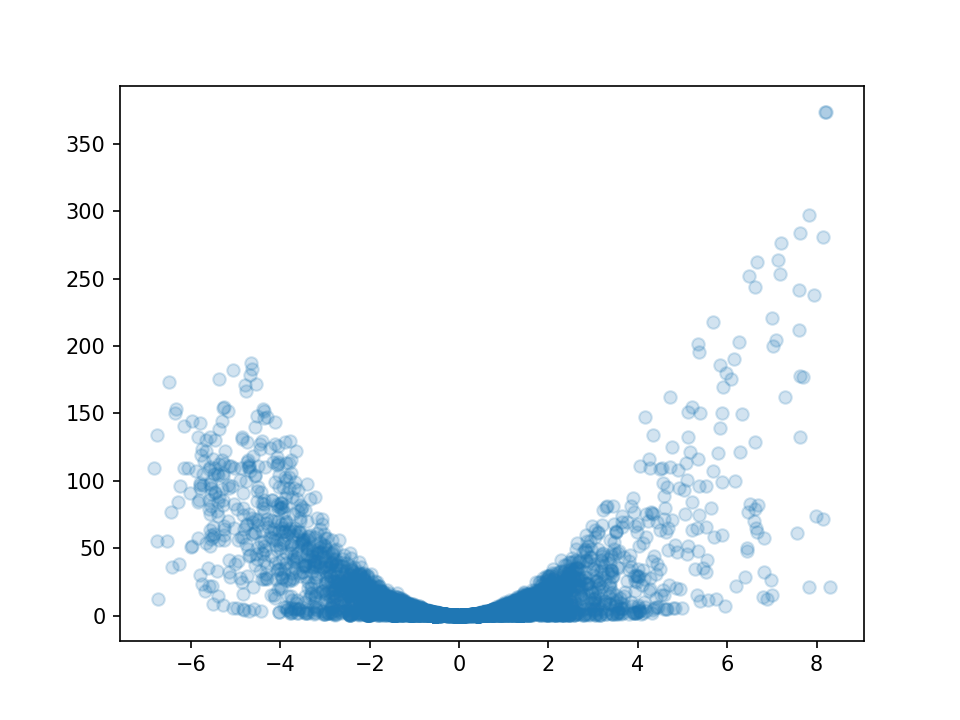

In [43]:
plt.scatter(lfc_SC['log2FoldChange'],-np.log(lfc_SC['padj']),alpha = 0.2)

Choose cutoff such that fold change and padj are above the line that passes through 

SC:
 1. (x,y) = (2.9, 72) and (4.6,0.21)
 2. (x,y) = (2.57, 56.6) and (4.11, 0.96)

KL: 
 1. (x,y) = (3.68,56.6) and (4.7, 3.97)
 2. (x,y) = (2.55, 30.2) and (3.85, 1.0)

thus we want the line y >= y1 + (y1 - y2)/(x1-x2) * (x - x1)

1. was chosen with no alpha. This gives 184 induced genes for SC and 71 for KL 
2. was chosen wiht alpha 0.2 so better able to see the distribution.  This gives 237 for SC and 203 for KL.


In [3]:
(x1,y1) = (2.57,56.6)
(x2,y2) = (4.11,0.96)

lfc_SC['nlog_padj'] = -np.log(lfc_SC['padj'])
lfc_SC['padj_test'] = y1 + (y2-y1)*(lfc_SC['log2FoldChange']-x1)/(x2-x1)
lfc_SC_act = lfc_SC[lfc_SC['nlog_padj'] > lfc_SC['padj_test']].copy()
lfc_SC_act.rename({'Unnamed: 0':'sc_genename'}, axis='columns', inplace=True)

In [4]:
target_promoter_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_act_20180304_LFC_padj_line_p2.fasta')
io_library.write_promoter_file(sc_promoters, list(lfc_SC_act['sc_genename']),target_promoter_fname)

<IPython.core.display.Javascript object>


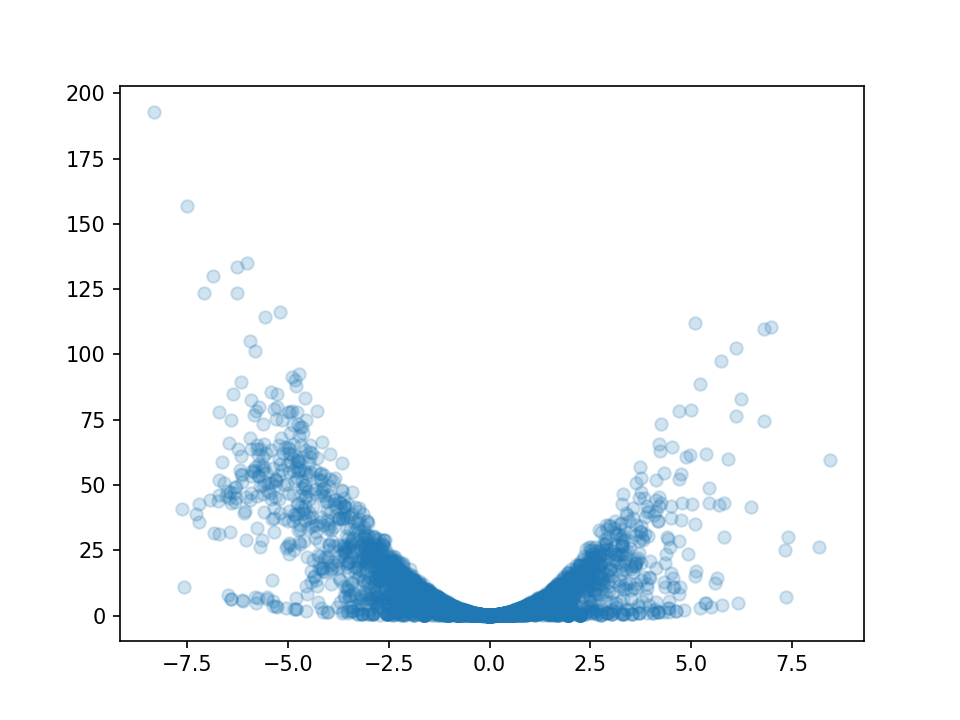

In [6]:
plt.scatter(lfc_KL['log2FoldChange'],-np.log(lfc_KL['padj']), alpha=0.2)

In [17]:

(x1,y1) = (2.55, 30.2)
(x2,y2) = (3.85, 1.0)

lfc_KL['nlog_padj'] = -np.log(lfc_KL['padj'])
lfc_KL['padj_test'] = y1 + (y2-y1)*(lfc_KL['log2FoldChange']-x1)/(x2-x1)
lfc_KL_act = lfc_KL[lfc_KL['nlog_padj'] > lfc_KL['padj_test']].copy()
lfc_KL_act.rename({'Unnamed: 0':'kl_genename'}, axis='columns', inplace=True)
kl_genenames_fixed = io_library.kl_genename_convert_list(list(lfc_KL_act['kl_genename']))
lfc_KL_act['kl_genename'] = kl_genenames_fixed

In [19]:
target_promoter_fname = data_processing_dir + os.path.normpath('kl_promoters/promoter_sets/kl_act_20180304_LFC_padj_line_p2.fasta')
io_library.write_promoter_file(kl_promoters, list(lfc_KL_act['kl_genename']),target_promoter_fname)

KLLA0C17908r not in promoter data set.
EBG00000982146 not in promoter data set.
KLLA0C17886r not in promoter data set.
EBG00000981572 not in promoter data set.
EBG00000982177 not in promoter data set.
EBG00000982260 not in promoter data set.
EBG00000981580 not in promoter data set.
EBG00000981812 not in promoter data set.
EBG00000981852 not in promoter data set.
EBG00000981753 not in promoter data set.
EBG00000982055 not in promoter data set.
EBG00000982195 not in promoter data set.
EBG00000981588 not in promoter data set.
EBG00000982310 not in promoter data set.
EBG00000982234 not in promoter data set.
EBG00000982277 not in promoter data set.
EBG00000981754 not in promoter data set.
EBG00000981865 not in promoter data set.


In [18]:
lfc_KL_act

,kl_genename,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,nlog_padj,padj_test
9,KLLA0D00979g,17534.477984,5.102421,0.335770,15.196190,3.747967e-52,1.998416e-49,112.134315,-27.131303
10,KLLA0C18117g,29724.125829,6.980883,0.462987,15.077939,2.262202e-51,1.096551e-48,110.431915,-69.324448
11,KLLA0F22341g,912.196897,6.793266,0.452219,15.022056,5.264919e-51,2.339379e-48,109.674199,-65.110282
13,KLLA0E19295g,1201.591657,6.119528,0.421613,14.514557,9.798863e-48,3.731967e-45,102.299394,-49.977094
15,KLLA0F12056g,721.339292,5.725890,0.404135,14.168246,1.440529e-45,4.800564e-43,97.442426,-41.135384
20,KLLA0F25916g,665.884668,5.210951,0.385698,13.510461,1.356700e-41,3.444725e-39,88.563975,-29.569059
26,KLLA0D05907g,879.002413,6.228917,0.476274,13.078420,4.374389e-39,8.638609e-37,83.039407,-52.434133
31,KLLA0D15521g,550.895212,4.994678,0.392531,12.724296,4.333630e-37,7.220911e-35,78.613497,-24.711234
32,KLLA0F27819g,670.125967,4.699923,0.370147,12.697461,6.107900e-37,9.578624e-35,78.330944,-18.090579
41,KLLA0F12628g,22135.881907,6.105799,0.486852,12.541397,4.431145e-36,5.625444e-34,76.560593,-49.668715


In [ ]:
# SC Only Active

# Take SC active set and remove KL active orthologs from the set. 

In [ ]:
#Binding site enrichment for 
#  SC Active
#  KL Active






#  SC Only Active
#  KL Only Active